`Import Packages`

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

`Reading the data`

In [2]:
df = pd.read_csv("dataset/FuelConsumption.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [5]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

`Polynomial Regression`

y = c + bx + ax^2

x_2 = x^2 

y = c + bx + ax_2

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)


In [10]:
clf = linear_model.LinearRegression()
clf.fit(train_x_poly,train_y)

print(f"coef=  {clf.coef_} and intercept = {clf.intercept_}")

coef=  [[ 0.         52.89822682 -1.78105925]] and intercept = [102.61188371]


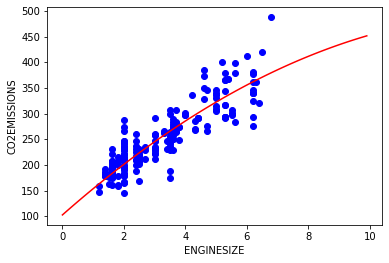

In [13]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS, color='blue')
xx = np.arange(0.0,10.0,0.1)
yy = clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [14]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"R2-score : {r2_score(test_y,test_y_)}")

R2-score : 0.7728879027124904


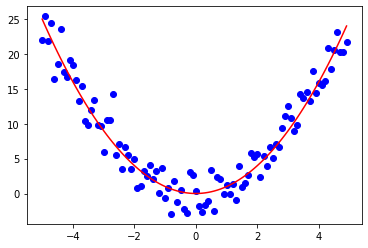

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x,2)

y_noise = 2*np.random.normal(size=x.size)
ydata = y+y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.show()


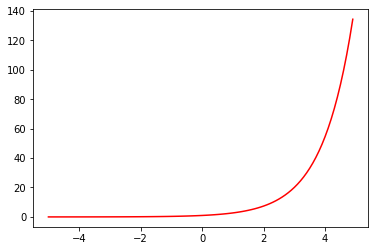

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)

plt.plot(x,y,'r')
plt.show()

/tmp/ipykernel_5738/1796278534.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


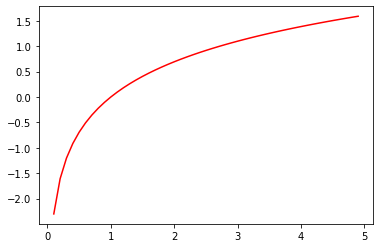

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.log(x)

plt.plot(x,y,'r')
plt.show()

`Sigmoidal / Logistic`

y =  a+b/(1+c^(x-d))

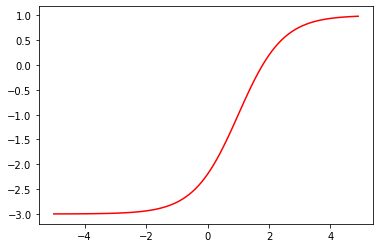

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1-4/(1+np.power(4,x-1))

plt.plot(x,y,'r')
plt.show()

In [16]:
df = pd.read_csv('dataset/china_gdp.csv')
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


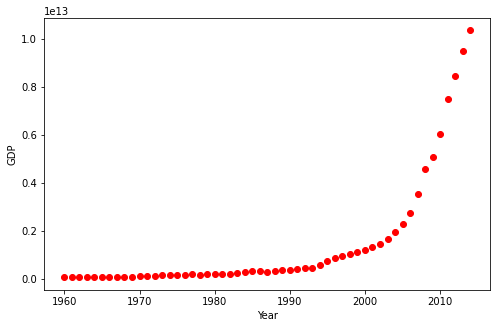

In [77]:
plt.figure(figsize=(8,5))
x_data,y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data,y_data,'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

`Choosing a model`

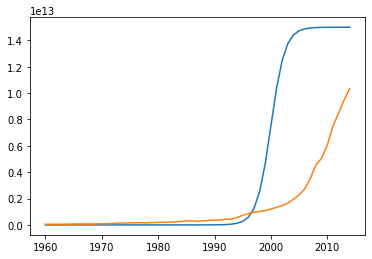

In [78]:
def sigmoid(x,Beta_1,Beta_2):
  y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
  return y


Beta_1 = .8
Beta_2 = 2000.0

y_pred = sigmoid(x_data,Beta_1,Beta_2)


plt.plot(x_data,y_pred*15000000000000)
plt.plot(x_data, y_data)
plt.show()

`How we find the best parameters !`

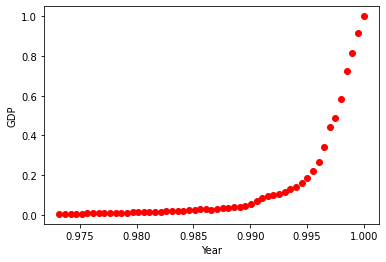

In [82]:
#normalize
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

plt.plot(xdata,ydata,'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [83]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid,xdata,ydata)

print(f"{popt} , {pcov}")


[690.45170921   0.99720713] , [[ 1.52271497e+03 -2.88118980e-04]
 [-2.88118980e-04  7.25961452e-09]]


In [94]:
popt

array([690.45170921,   0.99720713])

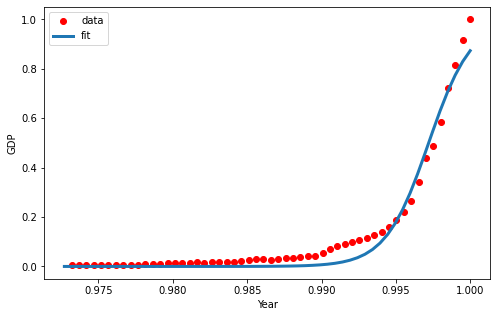

In [95]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, popt[0],popt[1])
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()